Import Libraries

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from LLS import LLS
import re
from sklearn.metrics import mean_absolute_error as mae

Load Data

In [316]:
df = pd.read_csv("Dollar_Rial_Price_Dataset.csv")

df.head()

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close
0,0,11/27/2011,1390/09/06,"13,700","13,700","13,700","13,700"
1,1,11/28/2011,1390/09/07,"13,440","13,440","13,440","13,440"
2,2,11/29/2011,1390/09/08,"13,350","13,350","13,350","13,350"
3,3,11/30/2011,1390/09/09,"13,400","13,400","13,400","13,400"
4,4,12/1/2011,1390/09/10,"13,500","13,500","13,500","13,500"


Preprocessing Data

In [317]:
df["Date"] = pd.to_datetime(df["Date"])

# Remove comma from numbers
for x in ["Open", "Low", "High", "Close"]:
    df[x] = df[x].apply(lambda x: re.sub(',', '', x))
    df[x] = df[x].astype(float)

# Convert date to number (2020/1/1 -> 20200101) for using in linear regression
df["Date_number"] = df["Date"].map(lambda date: 10000*date.year + 100*date.month + date.day)

# Remove Persian_Date column, because we don't need it anymore
df.drop(["Persian_Date"], axis= 1, inplace= True)

df.head()

,Unnamed: 0,Date,Open,Low,High,Close,Date_number
0,0,2011-11-27,13700.0,13700.0,13700.0,13700.0,20111127
1,1,2011-11-28,13440.0,13440.0,13440.0,13440.0,20111128
2,2,2011-11-29,13350.0,13350.0,13350.0,13350.0,20111129
3,3,2011-11-30,13400.0,13400.0,13400.0,13400.0,20111130
4,4,2011-12-01,13500.0,13500.0,13500.0,13500.0,20111201


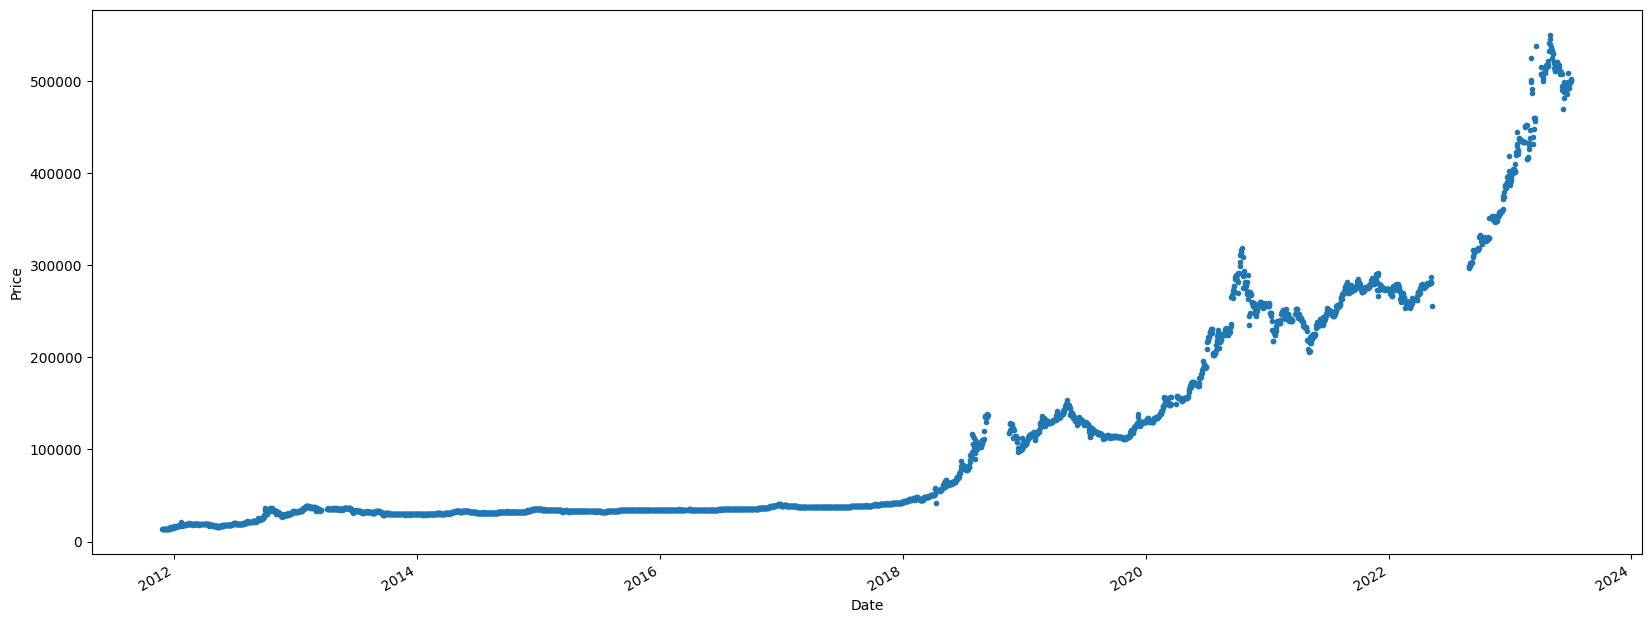

In [318]:
plt.figure(figsize=(20, 8))
plt.scatter(df["Date"], df["Close"], marker='.')
plt.xlabel("Date")
plt.ylabel("Price")
plt.gcf().autofmt_xdate()
plt.show()

Divide dataset to Ahmadinejad, Rouhani and Raisi's presidency

In [319]:
ahmadinejad_df = df[(df['Date'] <= '2013-03-08')].reset_index(drop= True)
rohani_df = df[(df["Date"] > '2013-03-08') & (df['Date'] <= '2021-03-08')].reset_index(drop= True)
raeisi_df = df[(df['Date'] > '2021-03-08')].reset_index(drop= True)

In [340]:
rohani_df

,Unnamed: 0,Date,Open,Low,High,Close,Date_number
0,377,2013-03-09,35450.0,34800.0,35450.0,34800.0,20130309
1,378,2013-03-10,34850.0,34450.0,34850.0,34750.0,20130310
2,379,2013-03-11,35300.0,34900.0,35500.0,35100.0,20130311
3,380,2013-03-12,35050.0,34700.0,35050.0,34750.0,20130312
4,381,2013-03-13,34300.0,34100.0,34450.0,34400.0,20130313
...,...,...,...,...,...,...,...
2362,2739,2021-03-03,244330.0,244330.0,247910.0,246680.0,20210303
2363,2740,2021-03-04,246700.0,246530.0,246790.0,246610.0,20210304
2364,2741,2021-03-06,246580.0,242700.0,246770.0,242710.0,20210306
2365,2742,2021-03-07,242800.0,239850.0,242810.0,239900.0,20210307


Show the highest dollar price in Ahmadinejad, Rouhani and Raisi's presidency respectively

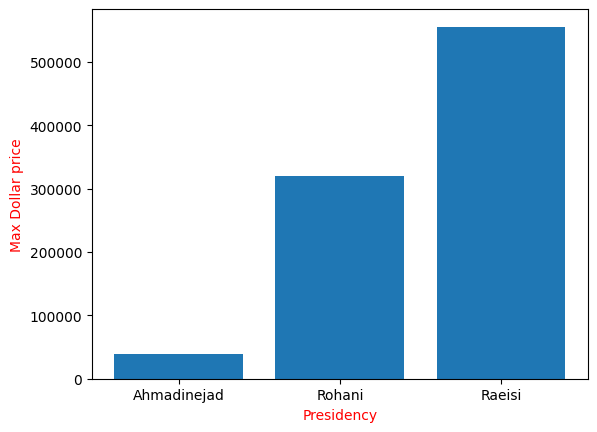

In [346]:
for x in ([ahmadinejad_df, rohani_df, raeisi_df]):
    highest_dollar_price = []
    y = ["Ahmadinejad", "Rohani", "Raeisi"]
    highest_dollar_price.append(ahmadinejad_df["High"].max())
    highest_dollar_price.append(rohani_df["High"].max())
    highest_dollar_price.append(raeisi_df["High"].max())

plt.bar(y, highest_dollar_price)
plt.xlabel("Presidency", c= 'red')
plt.ylabel("Max Dollar price", c= 'red')
plt.show()

Show the lowest dollar price in Ahmadinejad, Rouhani and Raisi's presidency respectively

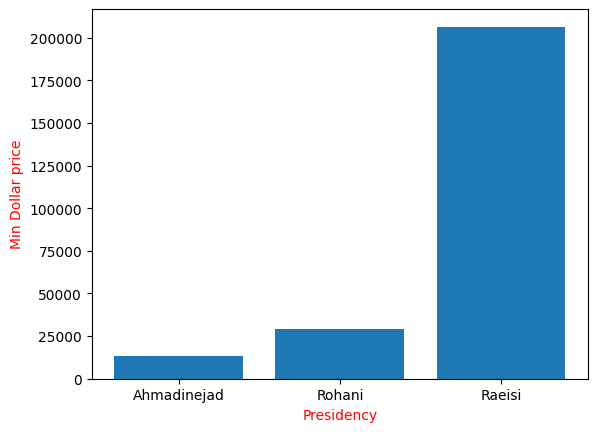

In [348]:
for x in ([ahmadinejad_df, rohani_df, raeisi_df]):
    lowest_dollar_price = []
    y = ["Ahmadinejad", "Rohani", "Raeisi"]
    lowest_dollar_price.append(ahmadinejad_df["Close"].min())
    lowest_dollar_price.append(rohani_df["Close"].min())
    lowest_dollar_price.append(raeisi_df["Close"].min())

plt.bar(y, lowest_dollar_price)
plt.xlabel("Presidency", c= 'red')
plt.ylabel("Min Dollar price", c= 'red')
plt.show()

Dollar price in Mamooti's presidency

In [322]:
ahmadinejad_df

,Unnamed: 0,Date,Open,Low,High,Close,Date_number
0,0,2011-11-27,13700.0,13700.0,13700.0,13700.0,20111127
1,1,2011-11-28,13440.0,13440.0,13440.0,13440.0,20111128
2,2,2011-11-29,13350.0,13350.0,13350.0,13350.0,20111129
3,3,2011-11-30,13400.0,13400.0,13400.0,13400.0,20111130
4,4,2011-12-01,13500.0,13500.0,13500.0,13500.0,20111201
...,...,...,...,...,...,...,...
372,372,2013-03-03,36100.0,34900.0,36100.0,34900.0,20130303
373,373,2013-03-04,33900.0,32850.0,33900.0,33050.0,20130304
374,374,2013-03-05,33300.0,33300.0,34700.0,34400.0,20130305
375,375,2013-03-06,34800.0,34800.0,35900.0,35900.0,20130306


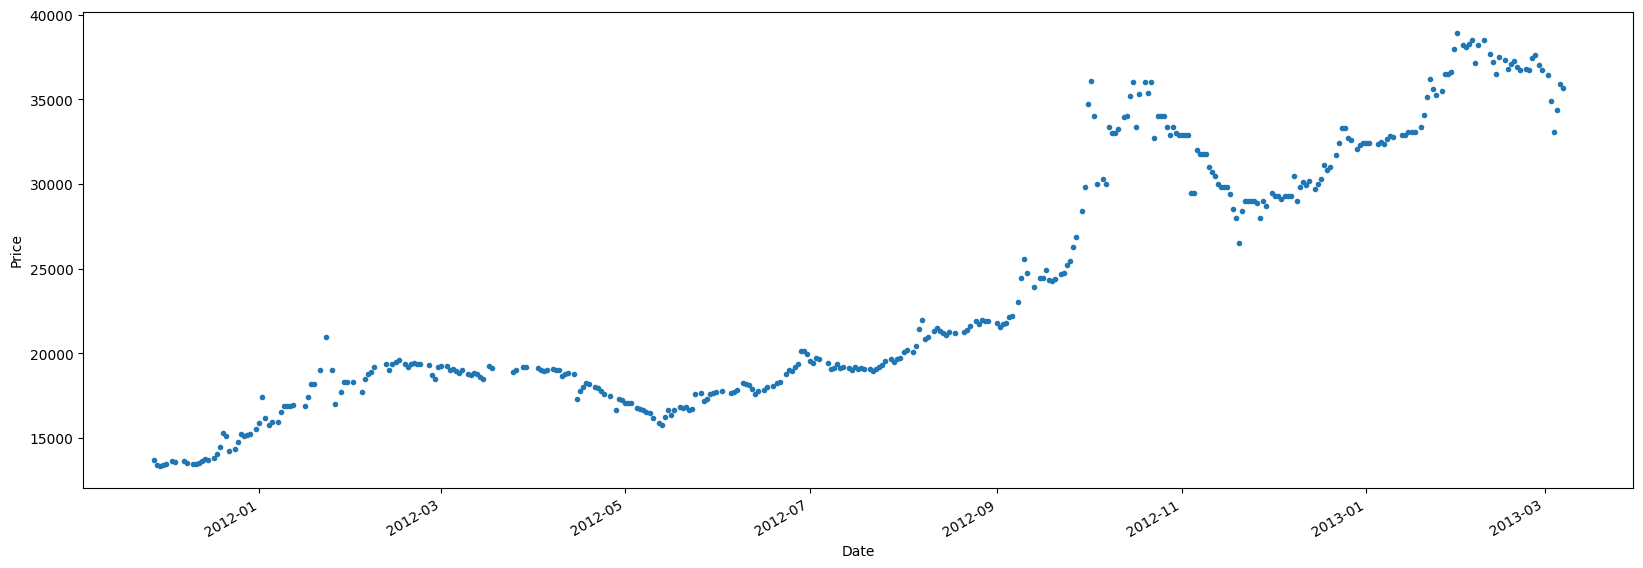

In [323]:
plt.figure(figsize=(20, 7))
plt.scatter(ahmadinejad_df["Date"], ahmadinejad_df["Close"], marker= '.')
plt.xlabel("Date")
plt.ylabel("Price")
plt.gcf().autofmt_xdate()
plt.show()

In [324]:
X = np.array(ahmadinejad_df[["Date_number"]])
Y = np.array(ahmadinejad_df[["Close"]])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((282, 1), (282, 1), (95, 1), (95, 1))

In [325]:
LLS = LLS()
w = LLS.fit(X_train, Y_train)


In [326]:
Y_pred = w * X_test
mae_ahmadinejad = mae(Y_test, Y_pred)
mae_ahmadinejad 

6937.977100097237

Dollar price in Hassan's presidency

In [327]:

rohani_df

,Unnamed: 0,Date,Open,Low,High,Close,Date_number
0,377,2013-03-09,35450.0,34800.0,35450.0,34800.0,20130309
1,378,2013-03-10,34850.0,34450.0,34850.0,34750.0,20130310
2,379,2013-03-11,35300.0,34900.0,35500.0,35100.0,20130311
3,380,2013-03-12,35050.0,34700.0,35050.0,34750.0,20130312
4,381,2013-03-13,34300.0,34100.0,34450.0,34400.0,20130313
...,...,...,...,...,...,...,...
2362,2739,2021-03-03,244330.0,244330.0,247910.0,246680.0,20210303
2363,2740,2021-03-04,246700.0,246530.0,246790.0,246610.0,20210304
2364,2741,2021-03-06,246580.0,242700.0,246770.0,242710.0,20210306
2365,2742,2021-03-07,242800.0,239850.0,242810.0,239900.0,20210307


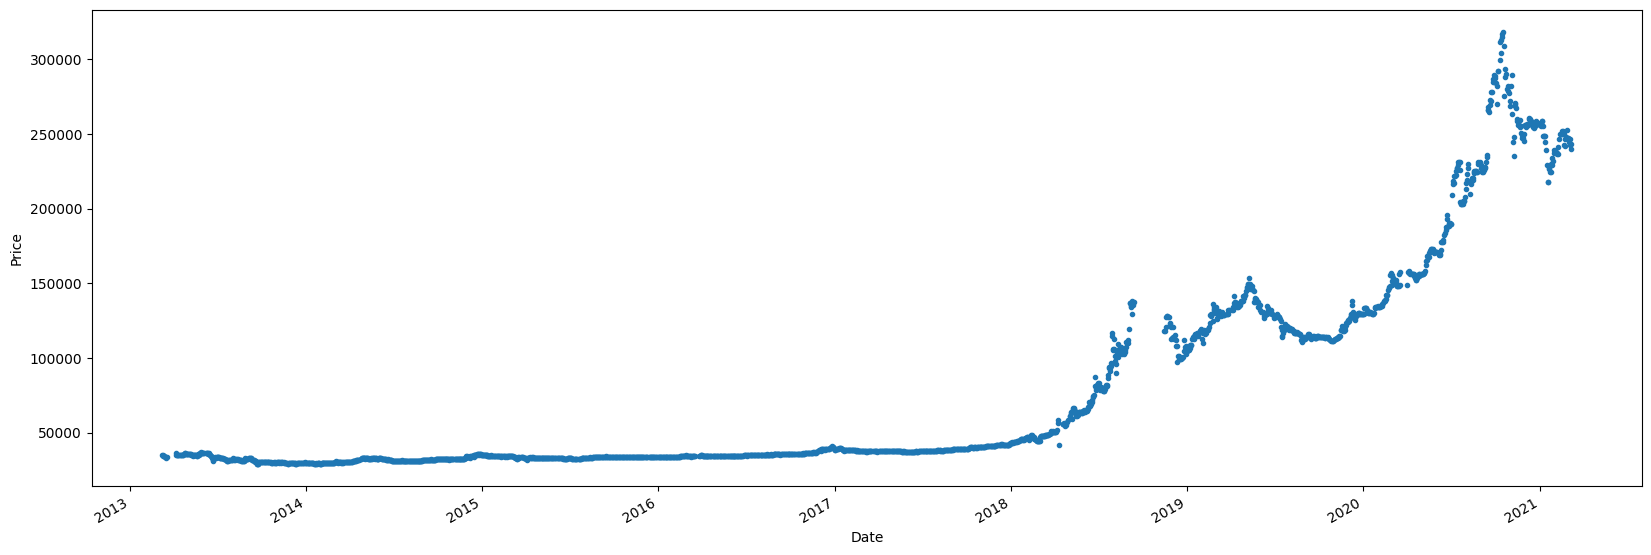

In [328]:
plt.figure(figsize=(20, 7))
plt.scatter(rohani_df["Date"], rohani_df["Close"], marker= '.')
plt.xlabel("Date")
plt.ylabel("Price")
plt.gcf().autofmt_xdate()
plt.show()

In [329]:
X = np.array(rohani_df[["Date_number"]])
Y = np.array(rohani_df[["Close"]])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1775, 1), (1775, 1), (592, 1), (592, 1))

In [330]:
LLS = LLS
w = LLS.fit(X_train, Y_train)
w

array([[0.00376386]])

In [331]:
Y_pred = w * X_test
mae_rohani = mae(Y_test, Y_pred)
mae_rohani

53215.873522269554

Dollar price in Raeisi's presidency

In [332]:

raeisi_df

,Unnamed: 0,Date,Open,Low,High,Close,Date_number
0,2744,2021-03-09,243240.0,241050.0,244280.0,242070.0,20210309
1,2745,2021-03-10,242100.0,241240.0,242710.0,242420.0,20210310
2,2746,2021-03-13,242400.0,241770.0,243850.0,241770.0,20210313
3,2747,2021-03-14,241810.0,239100.0,241880.0,239170.0,20210314
4,2748,2021-03-15,239200.0,239100.0,239210.0,239170.0,20210315
...,...,...,...,...,...,...,...
561,3305,2023-07-01,492660.0,492600.0,498400.0,498220.0,20230701
562,3306,2023-07-02,500810.0,498600.0,500900.0,499340.0,20230702
563,3307,2023-07-03,503210.0,501400.0,503400.0,502000.0,20230703
564,3308,2023-07-04,502140.0,498300.0,502200.0,500750.0,20230704


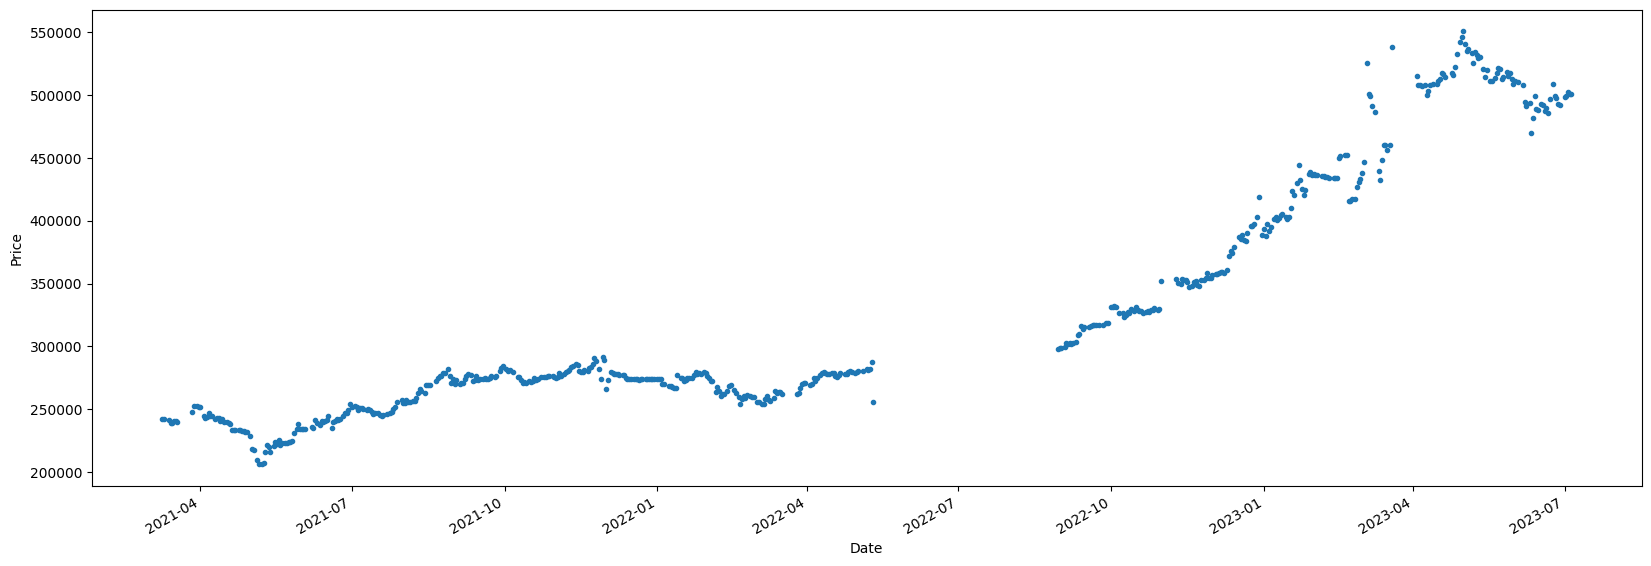

In [333]:
plt.figure(figsize=(20, 7))
plt.scatter(raeisi_df['Date'], raeisi_df["Close"], marker='.')
plt.xlabel("Date")
plt.ylabel("Price")
plt.gcf().autofmt_xdate()
plt.show()

In [334]:
X = np.array(raeisi_df[["Date_number"]])
Y = np.array(raeisi_df[["Close"]])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((424, 1), (424, 1), (142, 1), (142, 1))

In [335]:
LLS = LLS
w = LLS.fit(X_train, Y_train)

In [336]:
Y_pred = w * X_test
mae_raeisi = mae(Y_test, Y_pred)
mae_raeisi

81673.83463872269